Q2:
Prostate cancer dataset is the small dataset downloaded from kaggle. It is only 4kb in size and contains only 9 attributes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd 
data = pd.read_csv('Prostate_Cancer.csv')

<h3>Lets explore the data first</h3>

In [3]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [4]:
data.tail

<bound method NDFrame.tail of      id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242         

In [5]:
data.shape

(100, 10)

In [6]:
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [7]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [8]:
data.dtypes

id                     int64
diagnosis_result      object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

<h3>Here starts the data wrangling / preprocessing part which is the preliminary requirement for optimal data analysis</h3>
<p>Following steps are involved
<br>1. Finding missing values
<br>2. Changing data types of features, if require
<br>3. Encoding of data for categorical features</p>

In [9]:
data.isnull().values.any()

False

<p>There are no missing values in the data. So first part of preprocessing is accomplished.</p>

Diagnosis result is the only column with categorical features. This column holds alot of importance in our data.

In [10]:
data.diagnosis_result = [1 if each == 'M' else 0 for each in data.diagnosis_result]

In [11]:
data.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

<h3>Feature Selection</h3>
<p>We will choose the features that contribute towards cancer diagnosis. The id of the patient doesnot contribute to our diagnosis. So we will drop it</p>

In [12]:
data.drop(['id'],axis=1,inplace=True)

In [13]:
data.describe()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.620000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,0.487832,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,0.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,0.000000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,1.000000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,1.000000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,1.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [14]:
y = data.diagnosis_result.values
x_ = data.drop(['diagnosis_result'],axis=1)

In [15]:
x_

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


<h3>Normalization</h3>
<p>After having a look at the data, we realize that different columns have values in different ranges</p>
<br>So we need to apply normalization to the data.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_)

In [17]:
x

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

<h3>Training and Test split</h3>

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#Lets create two arrays to store results of classification model
names=[] 
scores=[]

<h3>Classification</h3>
<h4>Lets apply our first logistic regression model</h4>

In [20]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train) 

print("Logistic Regression Classification Test Accuracy {}".format(lreg.score(x_test,y_test)))

Logistic Regression Classification Test Accuracy 0.8


In [21]:
names.append("Logistic Reg.")
scores.append(lreg.score(x_test,y_test))

<h4>Lets apply our next kNN classifier</h4>

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)  

knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 10: {}".format(knn.score(x_test,y_test)))

Score for Number of Neighbors = 10: 0.7


In [24]:
names.append("KNN")
scores.append(knn.score(x_test,y_test))

<h4>Lets try Random Forest classification model now</h4>

In [26]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))


Random Forest Classification Score:  0.75


In [27]:
names.append("Random Forest")
scores.append(rand_forest.score(x_test,y_test))

<h3>Concluding remarks</h3>

Text(0, 0.5, 'Method Score')

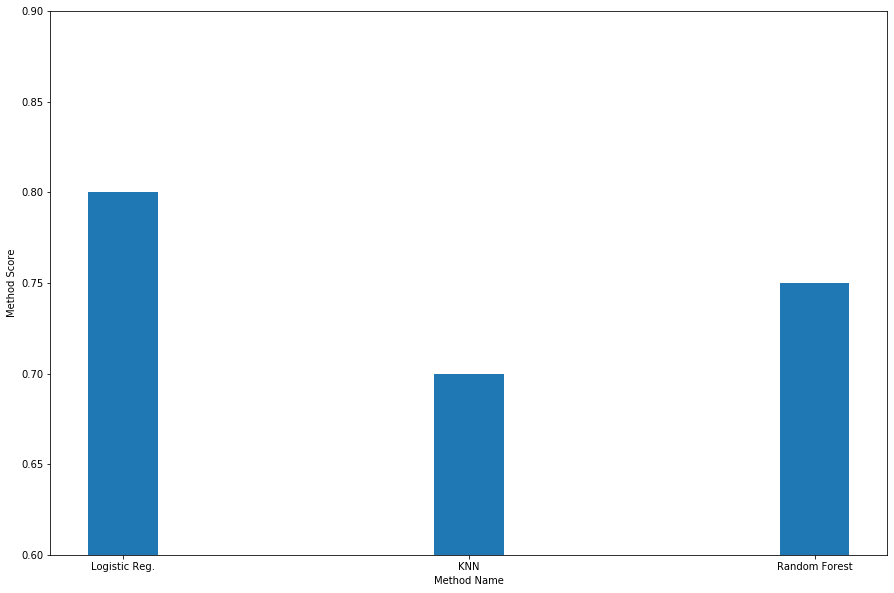

In [29]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(names,scores,width=0.2)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

<h3>As we can clearly see that Logistic regression performs best on Prostate cancer</h3> 